In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, classification_report, f1_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Loading the dataset

data = pd.read_csv("C:/Users/ronit/OneDrive/Ronit/Machine Learning/Projects/Random Forest/My Project/Data/Dataset_spine.csv")
data

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal,NaN
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal,NaN
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal,NaN
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal,NaN


In [3]:
data.shape

(310, 14)

In [4]:
data.isnull().sum()

Col1             0
Col2             0
Col3             0
Col4             0
Col5             0
Col6             0
Col7             0
Col8             0
Col9             0
Col10            0
Col11            0
Col12            0
Class_att        0
Unnamed: 13    296
dtype: int64

# Data preprocessing

In [5]:
data.drop('Unnamed: 13',axis=1, inplace = True)
data

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [6]:
data.columns = ["Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis Angle", "Sacral Slope", "Pelvic Radius", 
                "Degree Spondylolisthesis", "Pelvic Slope", "Direct Tilt", "Thoracic Slope", "Cervical Tilt", "Sacrum Angle",
                "Scoliosis Slope", "Class Attribute"]
data

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Degree Spondylolisthesis,Pelvic Slope,Direct Tilt,Thoracic Slope,Cervical Tilt,Sacrum Angle,Scoliosis Slope,Class Attribute
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [7]:
# Mapping Nominal data to numeric values to perform Random Forest effectively

temp = {"Abnormal": 0, "Normal": 1}

# Performing automated EDA using Autoviz library

In [8]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [9]:
data.to_csv('spinaldata.csv')

Shape of your Data Set: (310, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  12
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    14 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 78


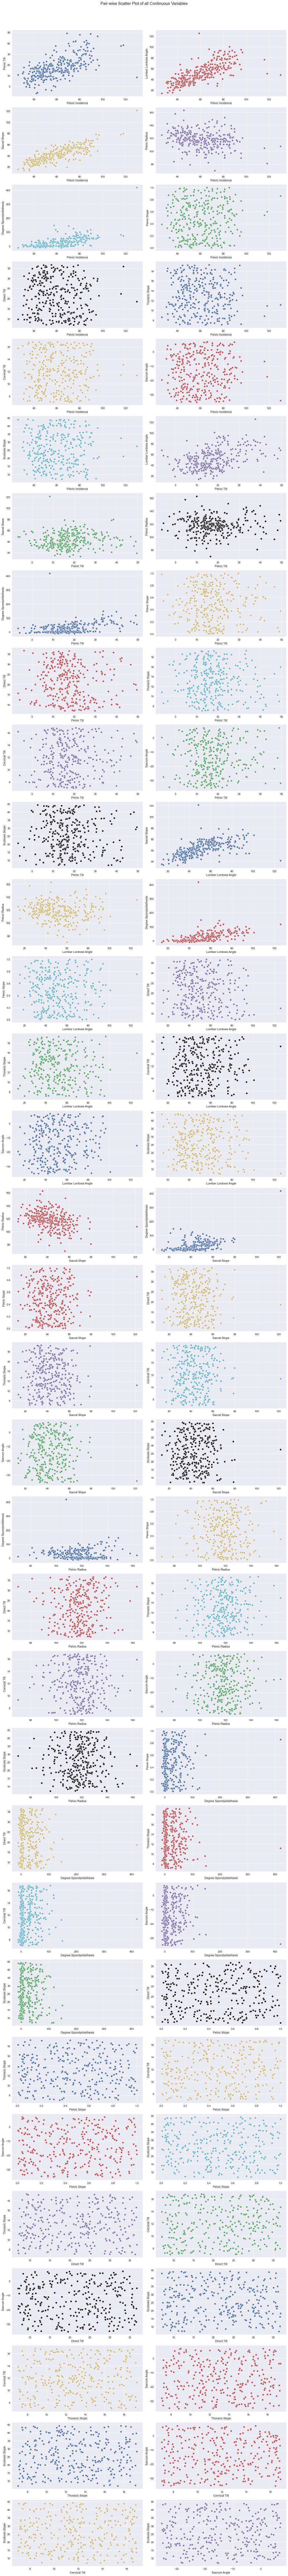

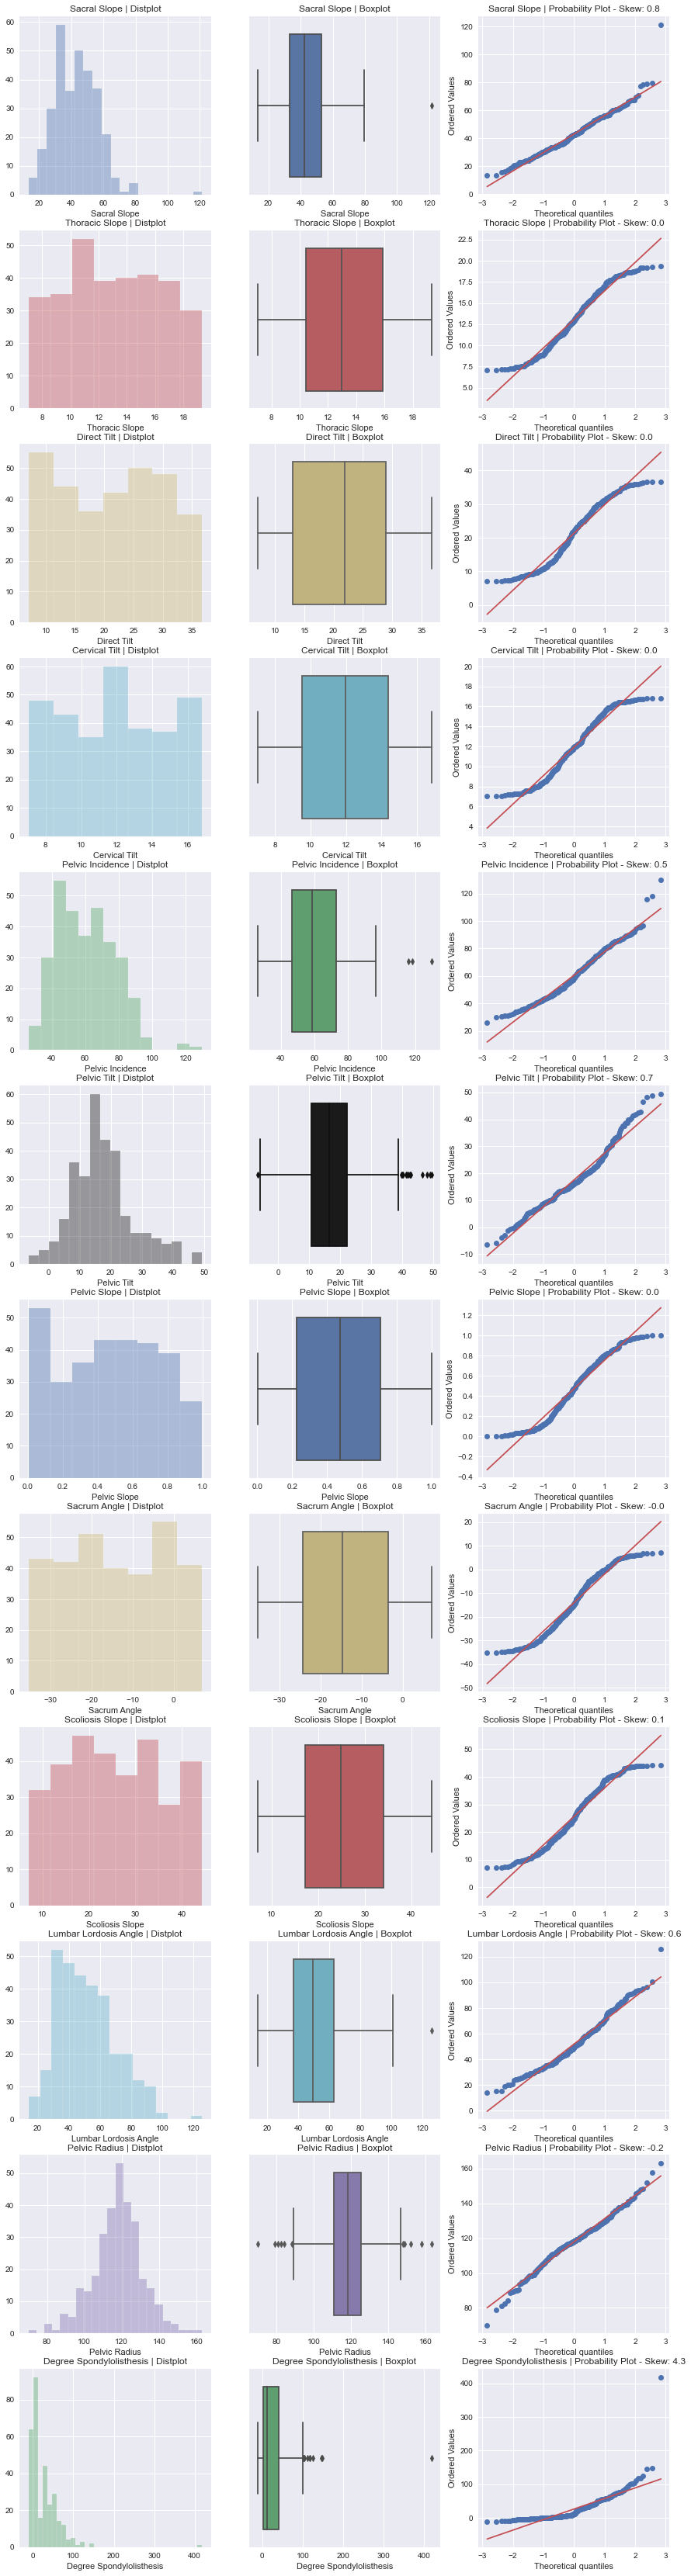

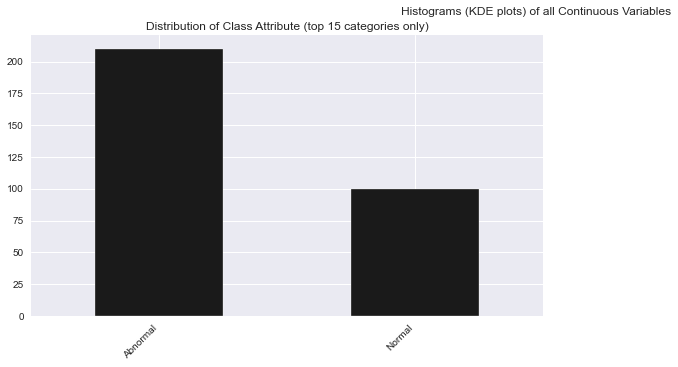

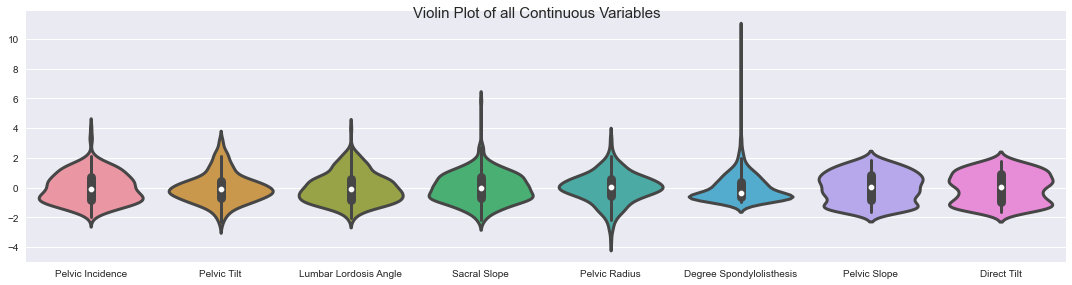

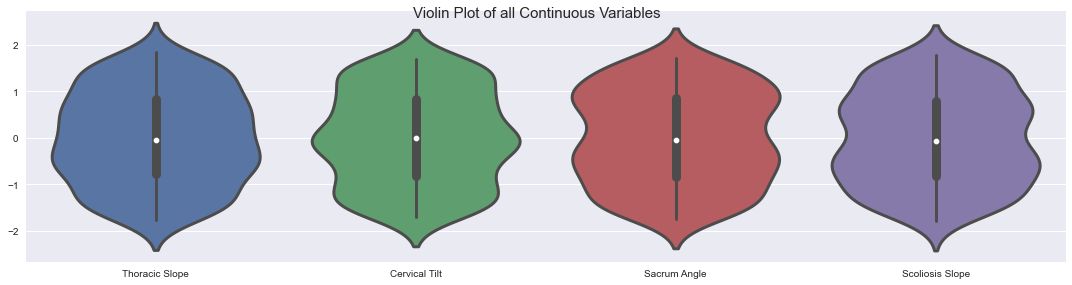

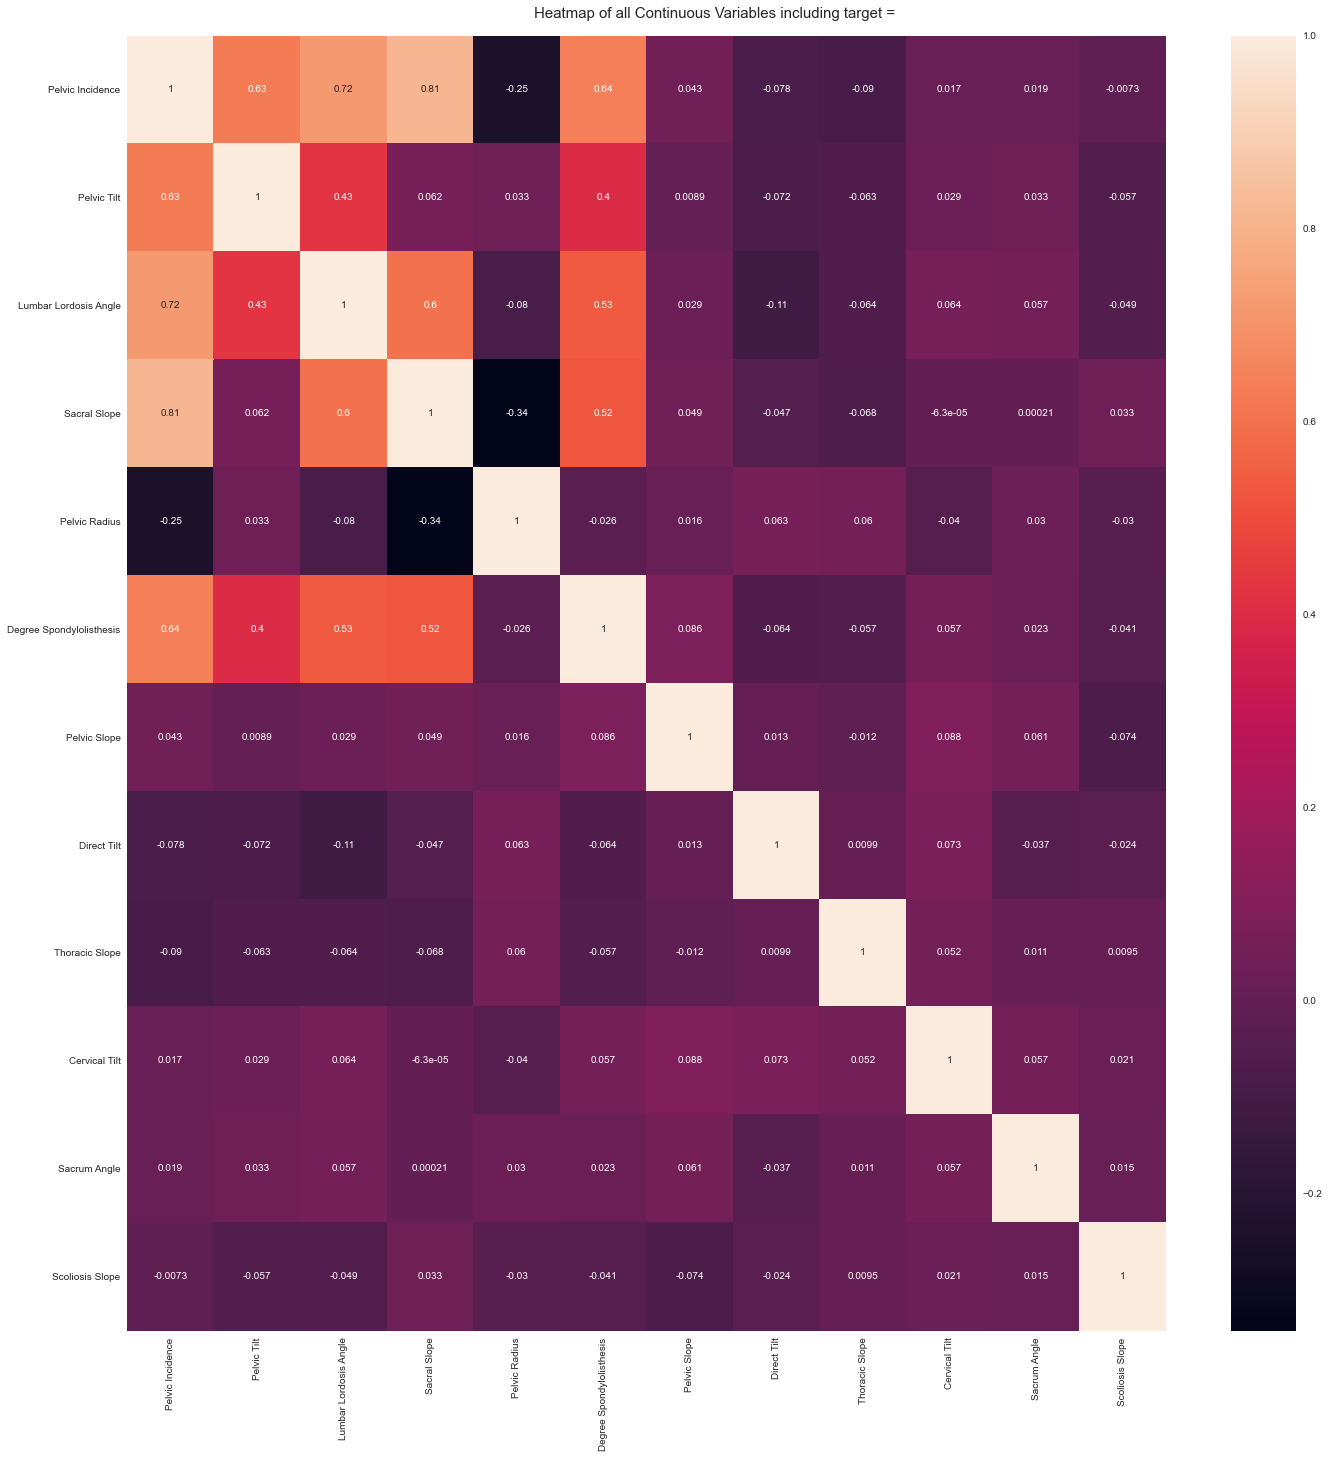

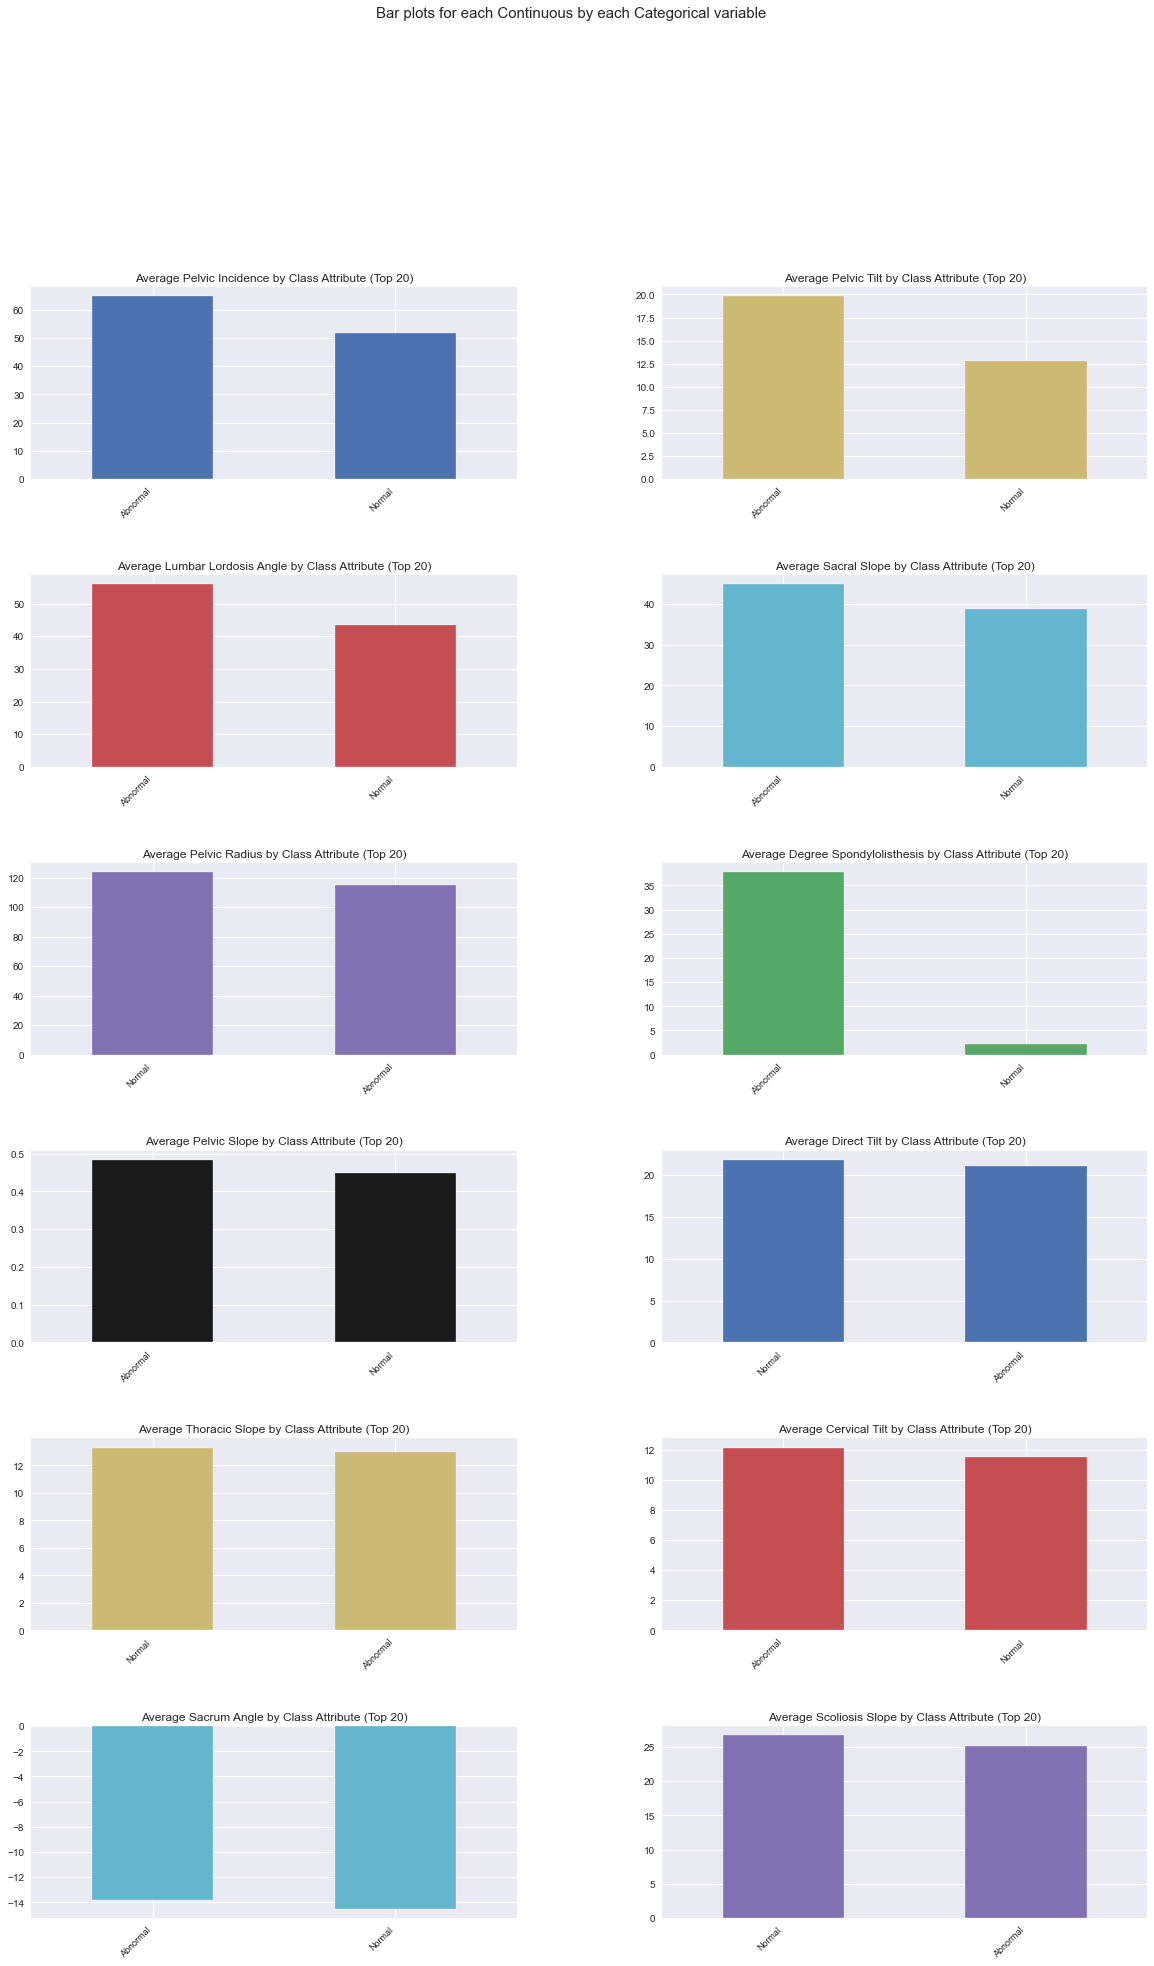

Time to run AutoViz (in seconds) = 43.162

 ###################### VISUALIZATION Completed ########################


In [10]:
filename = "spinaldata.csv" 
sep = "," 
dft = AV.AutoViz( filename, sep=",", depVar="", dfte=None, header=0, verbose=0, lowess=False, chart_format="svg", max_rows_analyzed=150000, max_cols_analyzed=30, )

In [11]:
X = data.drop("Class Attribute",axis=1)
y = data["Class Attribute"]

In [12]:
## Train test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

In [14]:
accuracyLR = accuracy_score(y_test,y_pred)
accuracyLR

0.7580645161290323

# Hyperparameters Tuning

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

parameters_grid = {"penalty" : ["l1", "l2"], "C" : np.logspace(-2, 2, 200), "solver" : ["lbfgs", "newton-cg", "liblinear", "sag", "saga"], "max_iter" : [15, 20, 25]}

grid_search = GridSearchCV(lr, param_grid = parameters_grid, cv=3, n_jobs = -1)

Fitting the model

In [16]:
grid_search.fit(X_train, y_train)

# Saving the best parameter combination to best_grid
best_grid = grid_search.best_estimator_

# Predicting using best_grid
Test_Prediction_Y = best_grid.predict(X_test)

print("Accuracy after Hyperparameters Tuning: ", accuracy_score(y_test, Test_Prediction_Y))

Accuracy after Hyperparameters Tuning:  0.7580645161290323


The accuracy has not increased even after optimising the Hyperparamaters!

In [23]:
# Printing the optimised hyperparameters, best cross validation score and the estimator

print("Tuned hyperparameter n_estimators: {}".format(grid_search.best_params_)) 
print("Best score: {}".format(grid_search.best_score_))
print("Best Estimator: {}".format(grid_search.best_estimator_))

Tuned hyperparameter n_estimators: {'C': 0.0505263106533568, 'max_iter': 20, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score: 0.8830443726124009
Best Estimator: LogisticRegression(C=0.0505263106533568, max_iter=20, solver='newton-cg')


Printing the optimised hyperparameters, best cross validation score and the estimator

In [17]:
results = pd.DataFrame(grid_search.cv_results_["params"])
results['test_score'] = grid_search.cv_results_["mean_test_score"]
results

,C,max_iter,penalty,solver,test_score
0,0.01,15,l1,lbfgs,NaN
1,0.01,15,l1,newton-cg,NaN
2,0.01,15,l1,liblinear,0.786463
3,0.01,15,l1,sag,NaN
4,0.01,15,l1,saga,0.782496
...,...,...,...,...,...
5995,100.00,25,l2,lbfgs,0.846753
5996,100.00,25,l2,newton-cg,0.875012
5997,100.00,25,l2,liblinear,0.866980
5998,100.00,25,l2,sag,0.834705


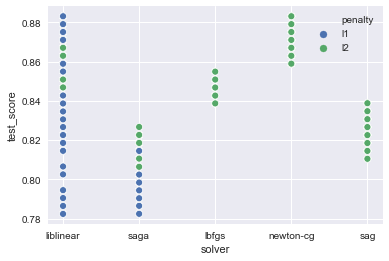

In [27]:
# Plotting the solvers against the Cross-validation scores

sns.scatterplot(x = "solver", y = "test_score", data = results, hue = "penalty")

              precision    recall  f1-score   support

    Abnormal       0.74      0.85      0.79        34
      Normal       0.78      0.64      0.71        28

    accuracy                           0.76        62
   macro avg       0.76      0.75      0.75        62
weighted avg       0.76      0.76      0.75        62





Text(0.5, 1.0, 'Confusion Matrix')

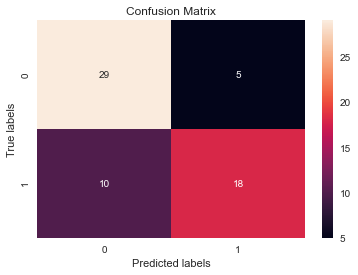

In [21]:
print(classification_report(y_test, Test_Prediction_Y))
print("\n")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, Test_Prediction_Y), annot=True, ax = ax)
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")

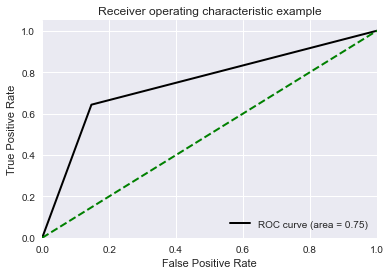

In [20]:
# Mapping the test set and the prediction set to Integers to plot the ROC Curve effectively
Test_Prediction_Y1 = pd.Series(Test_Prediction_Y)
Test_Prediction_Y1=Test_Prediction_Y1.map(temp)

y_test1 = pd.Series(y_test)
y_test1=y_test1.map(temp)

# Computing the ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test1, Test_Prediction_Y1)
roc_auc = auc(fpr, tpr)

# Plotting the Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='black',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The Area under curve is 0.75 indicating that the model is good.

# The End!
https://github.com/ronitch